<a href="https://colab.research.google.com/github/1e16miin/project1/blob/main/session1_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.//group by해서 chi2

연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.// 범주형 변수? chi2

출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [167]:
import pandas as pd
import numpy as np


df = pd.read_csv("vgames2.csv", na_values=["N/A", "Unknown", "Misc"])
df = df.drop(["Unnamed: 0"], axis = 1)

In [2]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,NaN,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [168]:
for col in df.columns:
  print(col, df[col].isnull().sum())

Name 0
Platform 0
Year 271
Genre 1784
Publisher 261
NA_Sales 0
EU_Sales 0
JP_Sales 0
Other_Sales 0


Year와 Genre, Publisher 에서만 na_value가 존재한다.

In [169]:
def preprocess_name(name):
  idx = name.find('(')
  if idx != -1 and "Remake" not in name:
    name = name[:idx]
  return name

In [172]:
dropna_df = df.dropna()

In [173]:
genres = {name: genre for name,genre in zip(dropna_df["Name"], dropna_df["Genre"])}
years = {name: year for name,year in zip(dropna_df["Name"], dropna_df["Year"])}
publishers = {name: publisher for name,publisher in zip(dropna_df["Name"], dropna_df["Publisher"])}

In [174]:
for i in range(len(df)):
  try:
    if pd.isna(df.Genre[i]):
      df.Genre[i] = genres[df.Name[i]]
  except:
    df.Genre[i] = "Misc"

for i in range(len(df)):
  try:
    if pd.isna(df.Year[i]):
      df.Year[i] = years[df.Name[i]]
  except:
    df.Year[i] = np.nan

for i in range(len(df)):
  try:
    if pd.isna(df.Publisher[i]):
      df.Publisher[i] = publishers[df.Name[i]]
  except:
    df.Publisher[i] = "Unknown"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_laun

In [175]:
for col in df.columns:
  print(col, df[col].isnull().sum())

Name 0
Platform 0
Year 160
Genre 0
Publisher 0
NA_Sales 0
EU_Sales 0
JP_Sales 0
Other_Sales 0


In [177]:
df.loc[df.Year.isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers,Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
675,Battle vs. Chess,PS3,NaN,Misc,TopWare Interactive,0,0.04,0,0.01
...,...,...,...,...,...,...,...,...,...
15805,Dream Dancer,DS,NaN,Misc,Unknown,0.01,0,0,0
15897,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0,0,0
16053,Karate,2600,NaN,Fighting,Ultravision,0.44,0.03,0,0
16130,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,Unknown,0,0,0.12,0


In [178]:
def preprocess_sales(numeric):#단위를 모두 K로 변환
  try:
    if numeric.isdigit():
      numeric *= 1e3
    else:
      if "K" in numeric:
        numeric = float(numeric.replace("K", ""))
      else:
        numeric = float(numeric.replace("M", ""))*1e3
    return numeric
  except:
    return 0

In [179]:
def preprocess_year(year):
  try:
    if year < 100:  
      if year <= 21:
        year += 2000
      else:
        year += 1900
    
    return int(year)
  except:
    return np.nan

In [180]:
df.Year = df.Year.apply(preprocess_year)
for sales in df.columns[-4:]:
  df[sales] = df[sales].apply(preprocess_sales)

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

In [181]:
from bs4 import BeautifulSoup
from urllib.parse import quote_plus
import requests
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


In [182]:
def fill_year(name):
  try:
    baseUrl = 'https://www.google.com/search?q='
    plusUrl = quote_plus(name)
    url = baseUrl + plusUrl
    driver.get(url)

    html = driver.page_source
    soup = BeautifulSoup(html)
    date = soup.select_one('.Eq0J8.LrzXr.kno-fv').text
    year = date.split(" ")[-1]
    return int(year)
  except:
    return np.nan

In [183]:
df.Year = df[["Name","Year"]].apply(lambda row: fill_year(row[0]) if pd.isna(row[1]) else row[1], axis=1)

In [184]:
df.loc[df.Year.isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1235,My Healthy Cooking Coach,DS,NaN,Simulation,Unknown,90.0,0.0,0.0,10.0
1301,Move Fitness,PS3,NaN,Sports,Sony Computer Entertainment,0.0,170.0,0.0,50.0
1796,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,Idea Factory,0.0,0.0,10.0,0.0
2062,Shorts,DS,NaN,Platform,Unknown,10.0,0.0,0.0,0.0
2408,Writing and Speaking Beautiful Japanese DS,DS,NaN,Misc,Unknown,0.0,0.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...
15805,Dream Dancer,DS,NaN,Misc,Unknown,10.0,0.0,0.0,0.0
15897,Virtua Quest,GC,NaN,Role-Playing,Unknown,10.0,0.0,0.0,0.0
16053,Karate,2600,NaN,Fighting,Ultravision,440.0,30.0,0.0,0.0
16130,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,Unknown,0.0,0.0,120.0,0.0


In [185]:
year_platform = df[["Year", "Platform"]]

In [186]:
year_platform_crosstab = pd.crosstab(df.Platform, df.Year, dropna=True, margins=True)

In [187]:
year_platform_crosstab

Year,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0,All
Platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2600,10,46,36,11,1,1,2,6,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118
3DO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3DS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,118,95,91,79,86,35,0,0,507
DC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,14,20,8,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,52
DS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,118,203,379,495,407,327,155,27,9,1,0,0,0,1,2146
GB,0,0,0,0,0,0,0,0,1,10,3,9,7,0,3,4,6,9,8,11,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98
GBA,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,107,198,150,176,136,40,6,0,0,0,0,0,0,0,0,0,0,0,816
GC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,154,148,84,98,41,4,0,0,0,0,0,0,0,0,0,0,0,551
GEN,0,0,0,0,0,0,0,0,0,0,1,1,6,7,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27


In [188]:
means = []
for row in range(len(year_platform_crosstab)-1):
    means.append(np.dot(year_platform_crosstab.iloc[row][:-1], year_platform_crosstab.columns[:-1]))

In [189]:
means = round(means/year_platform_crosstab.All[:-1])

In [190]:
for i in range(len(df)):
  if pd.isna(df.Year[i]):
    df.Year[i] = means[df.Platform[i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [191]:
df.Year.isnull().sum()

0

Q1. 지역에 따라서 선호하는 게임 장르가 다를까?

In [192]:
genre_preference = df[["Genre", "NA_Sales",	"EU_Sales",	"JP_Sales",	"Other_Sales"]]
groupby_Genre = genre_preference.groupby(["Genre"])

In [193]:
groupby_Genre.sum().T

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,873320.0,103660.0,221590.0,416620.0,445530.0,123350.0,354730.0,309540.0,576600.0,182960.0,681350.0,68700.0
EU_Sales,521490.0,62070.0,101320.0,221600.0,201620.0,50730.0,235900.0,181580.0,313270.0,101380.0,376850.0,45320.0
JP_Sales,157900.0,52000.0,87350.0,115930.0,127650.0,53870.0,56400.0,344950.0,37280.0,63700.0,135370.0,49620.0
Other_Sales,185760.0,16810.0,36680.0,78760.0,51540.0,12520.0,77210.0,55960.0,102690.0,31490.0,134970.0,11360.0


In [194]:
from scipy.stats import chisquare, chi2_contingency, chi2
chi2_Q1 = chi2_contingency(groupby_Genre.sum().T, correction=False)
pvalue_Q1 = chi2_Q1[1]

In [195]:
pvalue_Q1

0.0

Q2. 연도별 게임의 트렌드가 있을까?

In [214]:
df["Total_Sales"] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales

In [262]:
groupby_Year_Genre = df[["Year", "Genre", "Total_Sales"]].groupby(["Year", "Genre"]).sum()
year_trend = groupby_Year_Genre.unstack(level=1).fillna(0)

In [263]:
year_trend

Total_Sales                     ...                              
Genre       Action Adventure Fighting  ... Simulation    Sports Strategy
Year                                   ...                              
1980.0       800.0       0.0    770.0  ...        0.0     500.0      0.0
1981.0     14790.0       0.0      0.0  ...      440.0     780.0      0.0
1982.0      8980.0    1300.0    470.0  ...        0.0    1730.0      0.0
1983.0      2860.0     400.0      0.0  ...        0.0    3200.0      0.0
1984.0      1850.0       0.0      0.0  ...        0.0    6170.0      0.0
1985.0      3520.0       0.0   1050.0  ...       40.0    1960.0      0.0
1986.0     13740.0       0.0      0.0  ...        0.0    5580.0      0.0
1987.0      1110.0    4380.0   5420.0  ...        0.0    3710.0      0.0
1988.0      1740.0       0.0      0.0  ...       30.0    3600.0      0.0
1989.0      4650.0       0.0      0.0  ...        0.0    5720.0      0.0
1990.0      6390.0       0.0      0.0  ...     1130.0    2110.0      0.0
1991.0      6760.0    2240.0    390.0  ...     2150.0    2410.0    940.0
1992.0      3840.0   12240.0  14230.0  ...     2140.0    2950.0    360.0
1993.0      1810.0      70.0   8750.0  ...      190.0    3180.0    810.0
1994.0      1550.0    3740.0   8470.0  ...     2720.0    8410.0   3570.0
1995.0      3580.0     710.0  14840.0  ...     4170.0    7990.0   6540.0
1996.0     18600.0    4180.0  18040.0  ...    11330.0   17420.0   5610.0
1997.0     27590.0    4970.0  11800.0  ...     9640.0   30240.0   7720.0
1998.0     39510.0    8080.0  31680.0  ...     7110.0   43210.0  13490.0
1999.0     28810.0    7610.0  14310.0  ...    11460.0   29210.0  18470.0
2000.0     33980.0    2960.0  20260.0  ...     3370.0   41260.0   8520.0
2001.0     54860.0    9120.0  18100.0  ...    19930.0   52050.0   7540.0
2002.0     87450.0   11070.0  25070.0  ...    10820.0   67230.0   5510.0
2003.0     69590.0    4520.0  23790.0  ...    21210.0   65270.0   8000.0
2004.0     76430.0    8630.0  17340.0  ...    10890.0   63760.0   7140.0
2005.0     86640.0    8530.0  23090.0  ...    38280.0   60890.0   5340.0
2006.0     66960.0   11480.0  22530.0  ...    21980.0  138060.0   4230.0
2007.0    107270.0   22440.0  17630.0  ...    48870.0   98240.0   9490.0
2008.0    143470.0   24030.0  35500.0  ...    46630.0   96010.0  12330.0
2009.0    137840.0   20790.0  32340.0  ...    34010.0  139250.0  12870.0
2010.0    119690.0   16570.0  14880.0  ...    22520.0   93530.0  14000.0
2011.0    122010.0   15910.0  22650.0  ...    15590.0   57710.0   9390.0
2012.0    126840.0    5950.0   9530.0  ...    13370.0   30900.0   3490.0
2013.0    125840.0    6690.0   7230.0  ...     8680.0   41540.0   6320.0
2014.0     99010.0    6090.0  16150.0  ...     5540.0   46640.0    970.0
2015.0     68250.0    8030.0   6780.0  ...     4610.0   41490.0   1830.0
2016.0     19850.0    1810.0   3850.0  ...      390.0   14630.0    520.0
2017.0        10.0       0.0      0.0  ...        0.0       0.0      0.0
2020.0         0.0       0.0      0.0  ...      290.0       0.0      0.0

[39 rows x 12 columns]

In [267]:
chi2_Q2 = chi2_contingency(year_trend, correction=False)
pvalue_Q2 = chi2_Q2[1]

In [266]:
pvalue_Q2

0.0

Q3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [270]:
top100_total_sales = df.sort_values(["Total_Sales"],ascending=False)[:100]

In [271]:
top100_total_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080.0,3580.0,6810.0,770.0,40240.0
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,35830.0
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,33000.0
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270.0,8890.0,10220.0,0.0,30380.0
...,...,...,...,...,...,...,...,...,...,...
7494,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5390.0,1180.0,700.0,190.0,7460.0
12850,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3240.0,1350.0,2420.0,430.0,7440.0
10937,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4790.0,1900.0,0.0,690.0,7380.0
8010,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4460.0,2130.0,60.0,690.0,7340.0


Text(0, 0.5, '# Games')

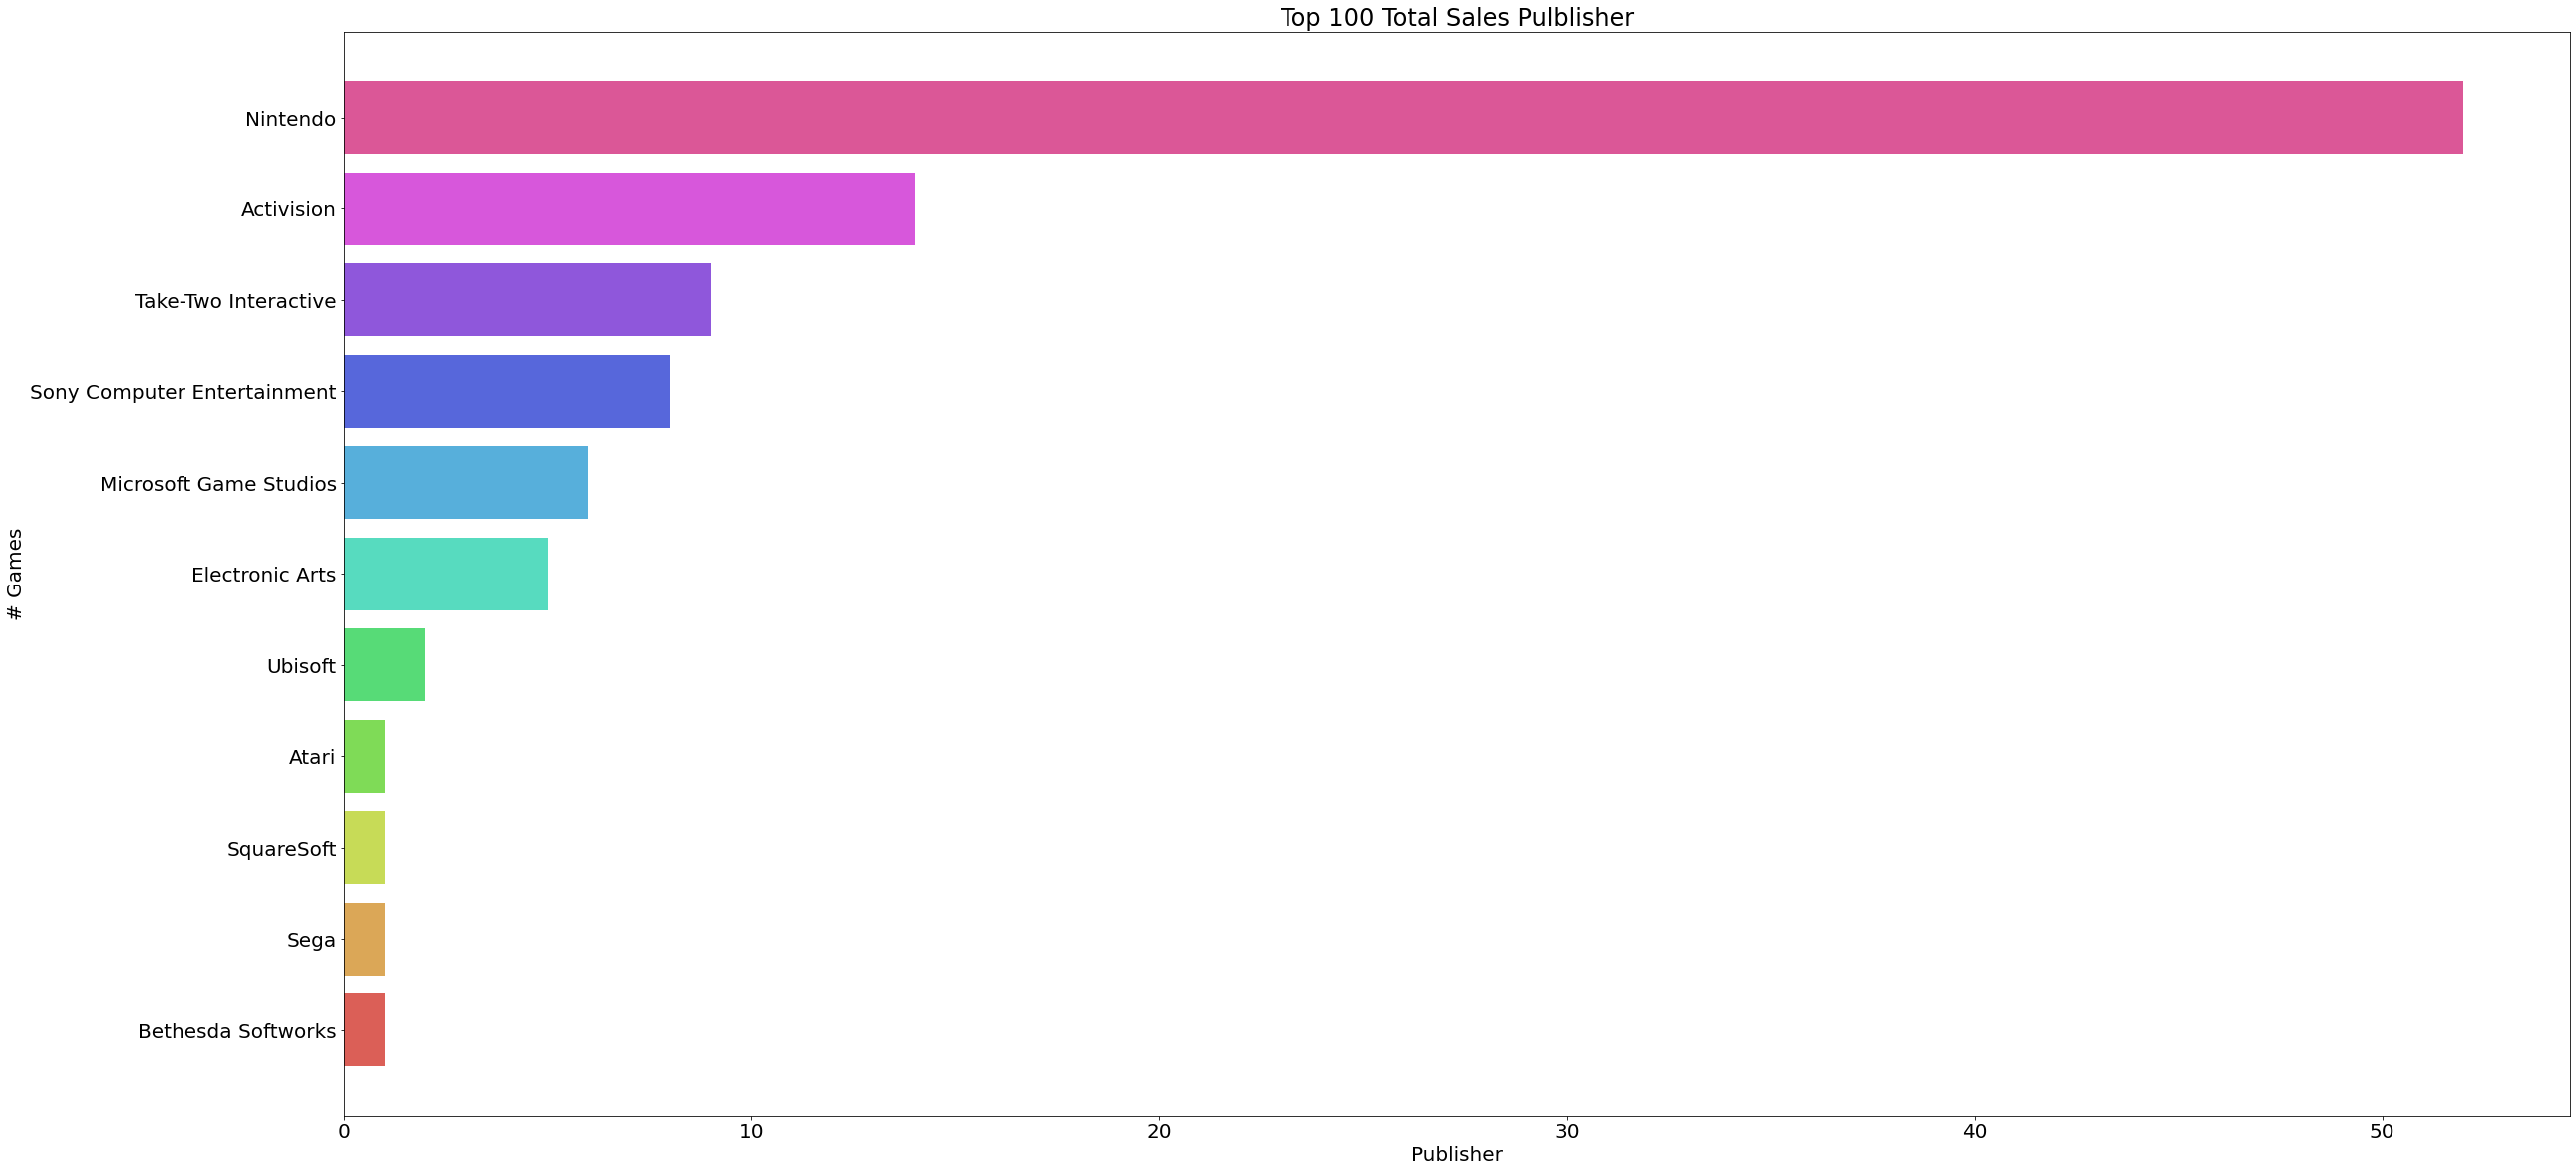

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

plt.rc('font', size=20)
plt.figure(figsize=(40, 20))

top100_total_sales_publisher = dict(sorted(Counter(top100_total_sales.Publisher).items(),key= lambda x:x[1]))
colors = sns.color_palette('hls',len(top100_total_sales_publisher))
plt.barh(list(top100_total_sales_publisher.keys()), top100_total_sales_publisher.values(), color=colors)
plt.title("Top 100 Total Sales Pulblisher")
plt.xlabel("Publisher")
plt.ylabel("# Games")
plt.show()

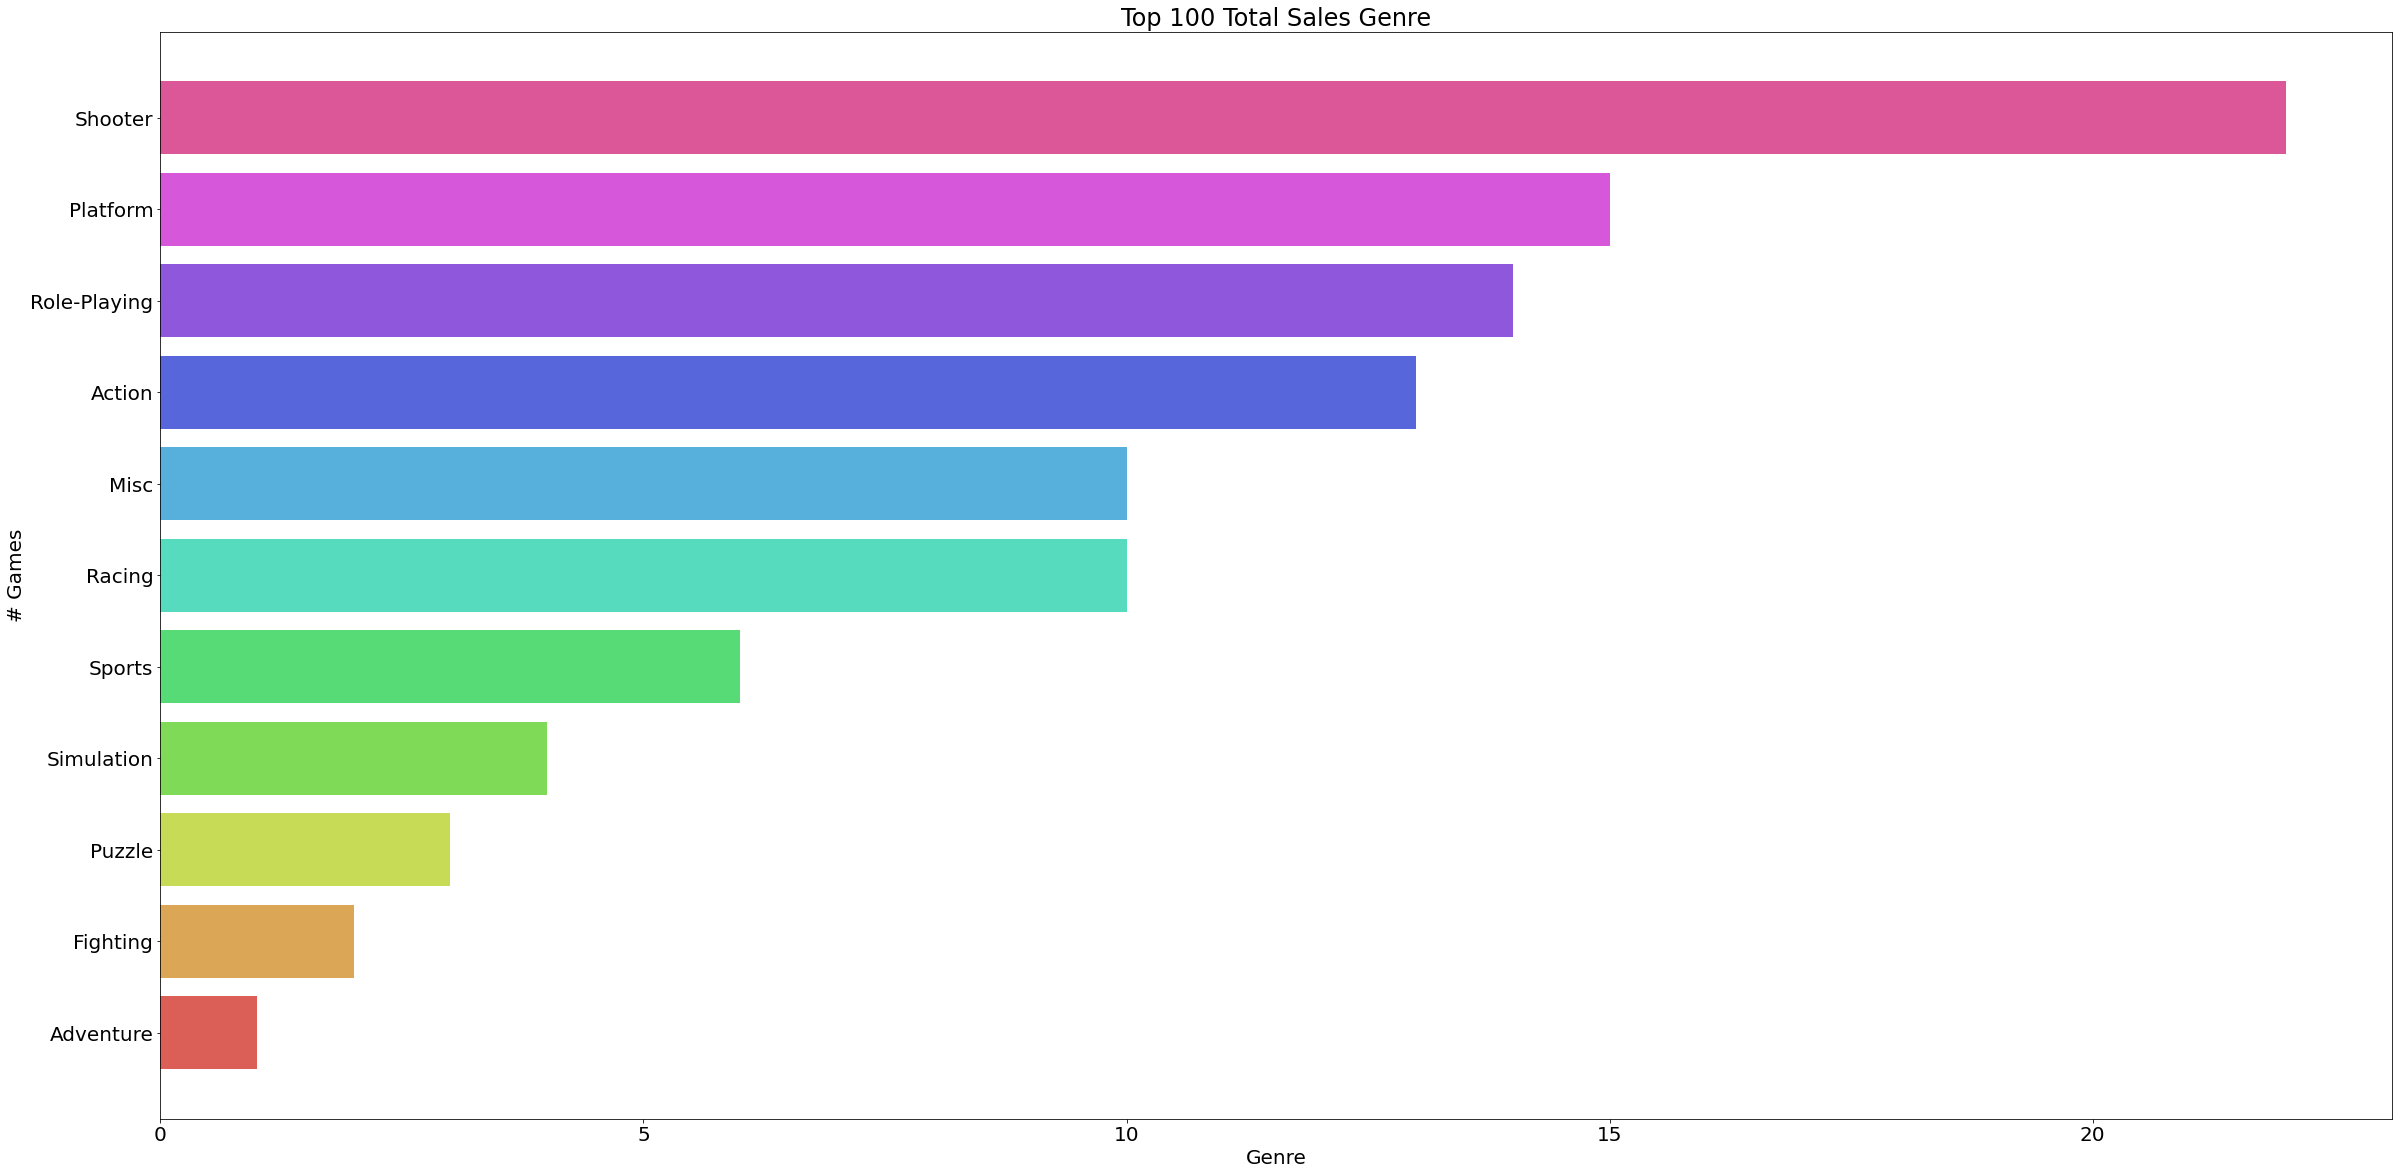

In [318]:
plt.rc('font', size=20)
plt.figure(figsize=(40, 20))

top100_total_sales_genre = dict(sorted(Counter(top100_total_sales.Genre).items(),key= lambda x:x[1]))
colors = sns.color_palette('hls',len(top100_total_sales_genre))
plt.barh(list(top100_total_sales_genre.keys()), top100_total_sales_genre.values(), color=colors)
plt.title("Top 100 Total Sales Genre")
plt.xlabel("Genre")
plt.ylabel("# Games")
plt.show()

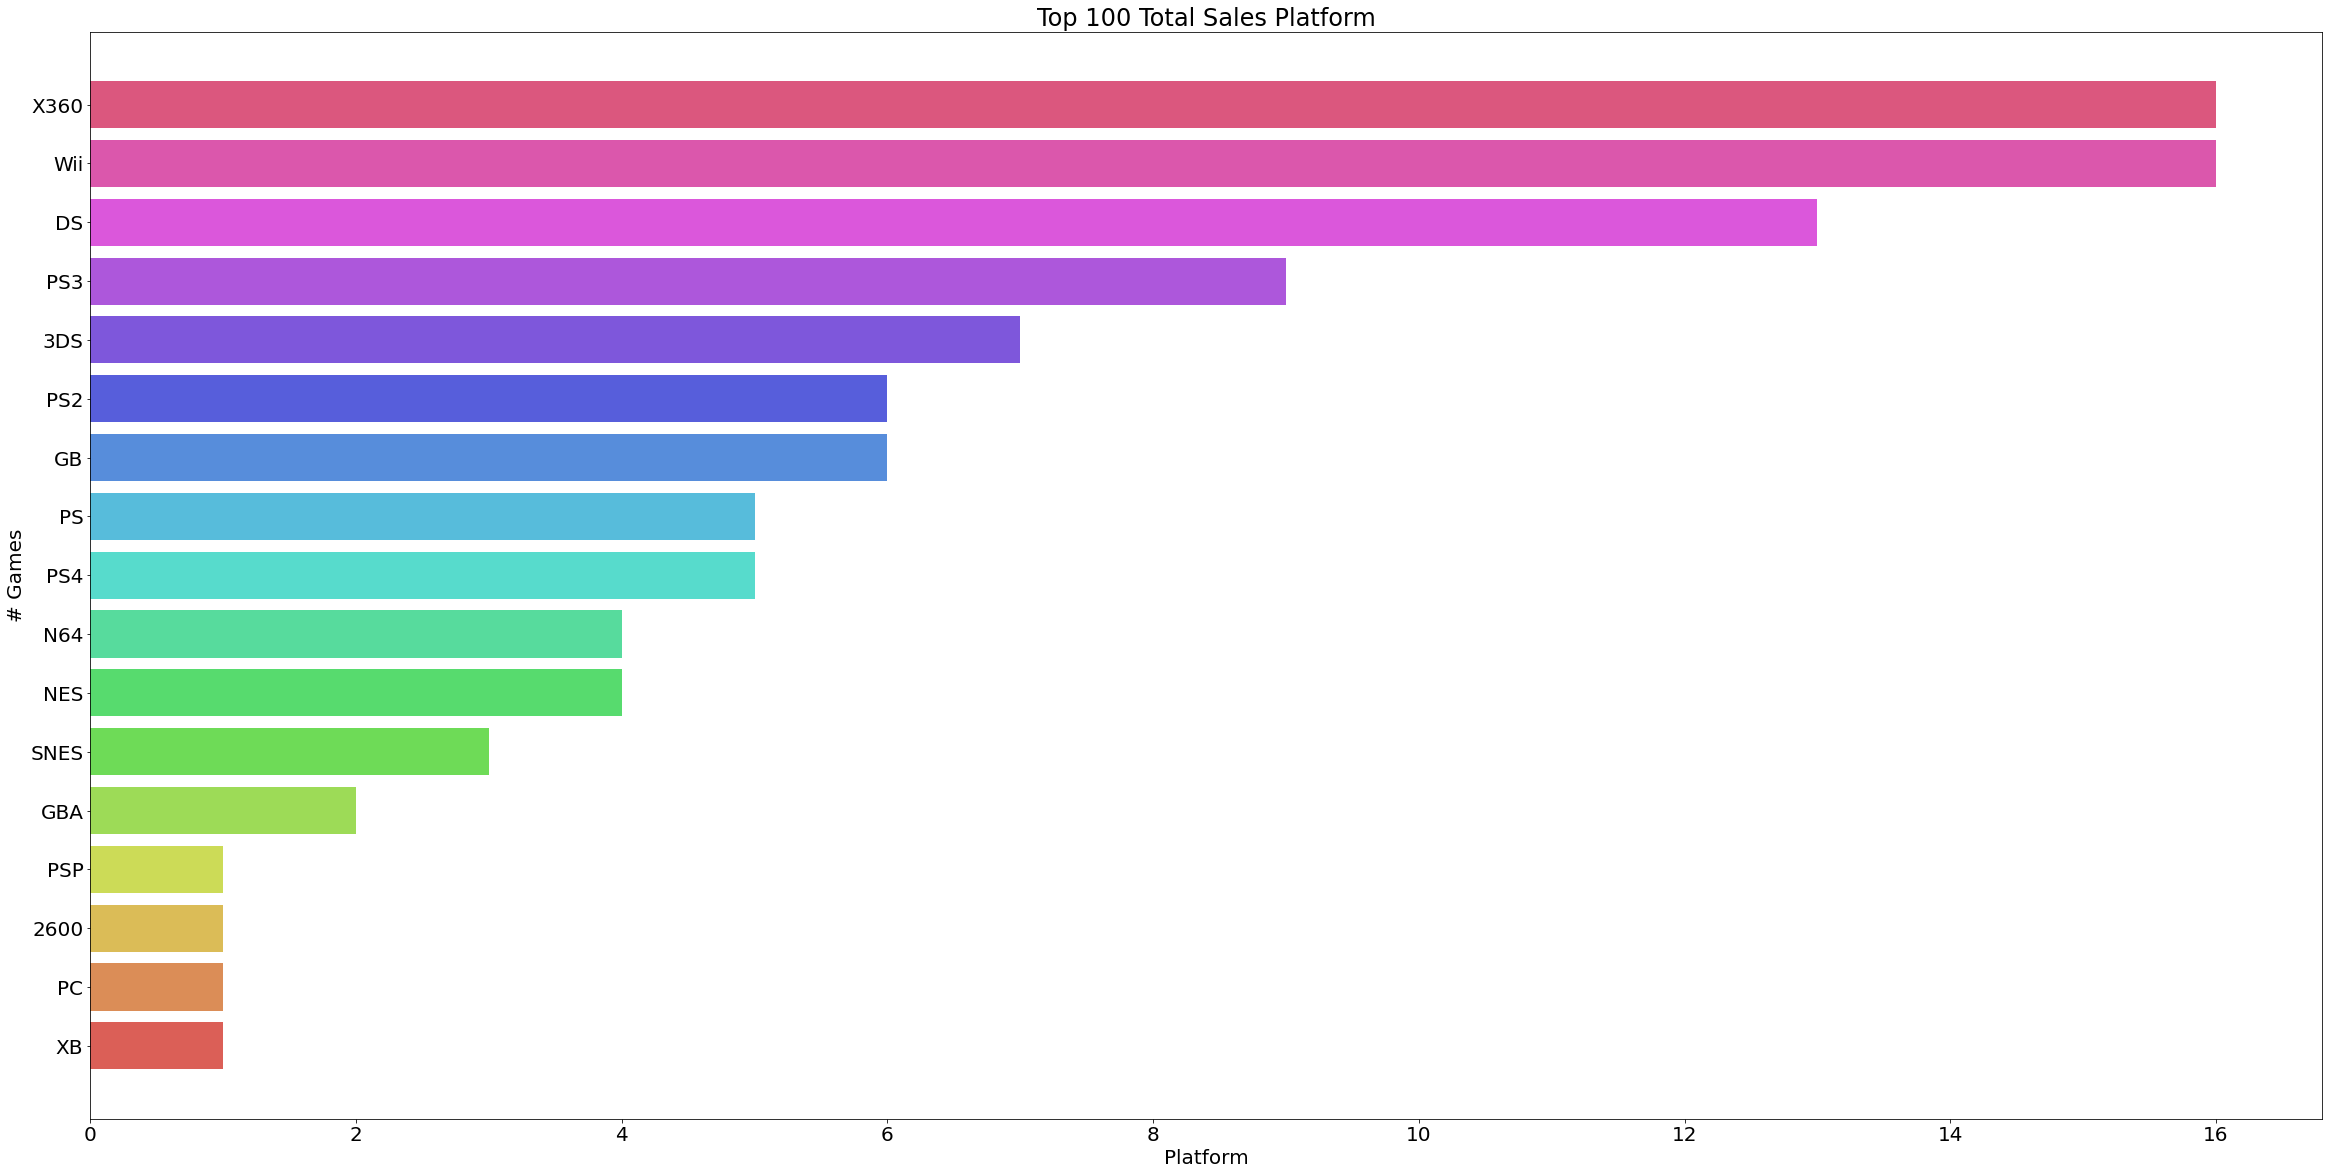

In [319]:
plt.rc('font', size=20)
plt.figure(figsize=(40, 20))

top100_total_sales_platform = dict(sorted(Counter(top100_total_sales.Platform).items(),key= lambda x:x[1]))
colors = sns.color_palette('hls',len(top100_total_sales_platform))
plt.barh(list(top100_total_sales_platform.keys()), top100_total_sales_platform.values(), color=colors)
plt.title("Top 100 Total Sales Platform")
plt.xlabel("Platform")
plt.ylabel("# Games")
plt.show()